# 주제: 지도 학습 - 분류(Classification) 알고리즘

* 이번 주에는 **머신러닝에서 분류(Classification) 문제를 해결하는 방법**을 배운다.
* 목표:
  * 분류 문제의 개념과 응용 이해
  * 주요 분류 알고리즘(`Logistic Regression`, `KNN`, `Decision Tree`, `Random Forest`, `SVM`) 학습
  * 분류 모델을 학습시키고 평가하는 방법 익히기

# 자유 실습

In [ ]:
## 여기서 실습을 자유롭게 수행하세요. 코드 셀을 여러개 생성해도 좋습니다. ##



















# 추가 연습 문제

## 1. 로지스틱 회귀의 결정 경계를 시각화하기

>**문제**: `matplotlib`을 사용하여 로지스틱 회귀 모델의 결정 경계를 시각화하라.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[(0.92, 80.0), (0.0, 512.3292)]

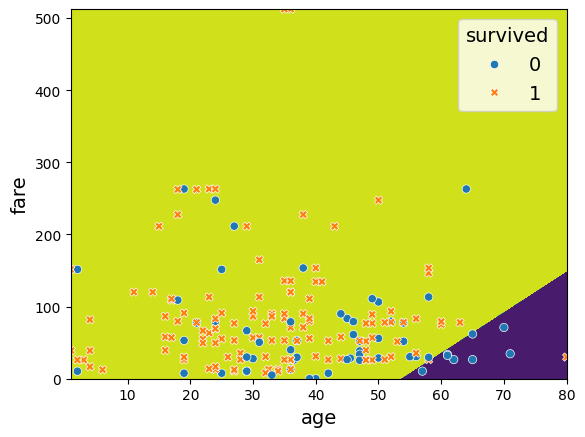

In [ ]:
## YOUR CODE HERE ##
# 연습 문제 4번까지 별도의 파일에서 풀고 복사/붙여넣기를 했습니다.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, Y_train)

age_min, age_max = X["age"].min(), X["age"].max()
fare_min, fare_max = X["fare"].min(), X["fare"].max()

xx, yy = np.meshgrid(np.arange(age_min, age_max, 0.1), np.arange(fare_min, fare_max, 0.1))
# np.meshgrid(벡터) 함수는 해당 벡터를 일정한 간격으로 배열함
XY = np.c_[xx.ravel(), yy.ravel()]
Y_pred = model.predict(XY)
Z = Y_pred.reshape(xx.shape)

plt.xlabel("age")
plt.ylabel("fare")
plt.contourf(xx, yy, Z)
sns.scatterplot(x="age", y="fare", hue="survived", style="survived", data=df).set(xlim = (age_min, age_max), ylim = (fare_min, fare_max))

## 2. KNN 모델에서 최적의 K 값 찾기

>**문제**: `GridSearchCV`를 사용하여 최적의 `n_neighbors` 값을 찾아라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = KNeighborsClassifier()

param_grid = {"n_neighbors" : [1, 5, 10, 100, 3, 7, 20, 50]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, Y_train)

print(f"Best Params: {grid.best_params_}")

Best Params: {'n_neighbors': 100}


## 3. 랜덤 포레스트 모델의 중요 변수(feature importance) 출력하기

>**문제**: `feature_importances_` 속성을 사용하여 중요한 변수를 출력하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, Y_train)

feature_importances = model.feature_importances_
print(f"Feature Importances: {feature_importances}")

Feature Importances: [0.47936379 0.52063621]


## 4. 결정 트리 모델을 시각화하기

>**문제**: `plot_tree()`를 사용하여 학습된 결정 트리 모델을 시각화하라.

[Text(0.375, 0.875, 'x[1] <= 7.85\ngini = 0.433\nsamples = 145\nvalue = [46, 99]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[0] <= 44.5\ngini = 0.41\nsamples = 139\nvalue = [40, 99]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 2.5\ngini = 0.327\nsamples = 97\nvalue = [20, 77]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.125, 'gini = 0.307\nsamples = 95\nvalue = [18, 77]'),
 Text(0.75, 0.375, 'x[0] <= 47.5\ngini = 0.499\nsamples = 42\nvalue = [20, 22]'),
 Text(0.625, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.875, 0.125, 'gini = 0.472\nsamples = 34\nvalue = [13, 21]')]

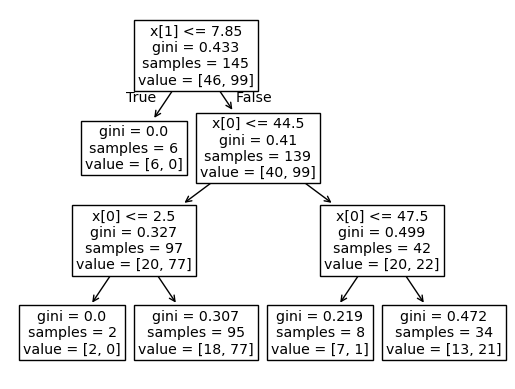

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, Y_train)

plot_tree(model)

## 5. SVM 모델에서 다양한 커널(kernel) 비교하기

>**문제**:  `linear`, `rbf`, `poly` 커널을 비교하여 정확도를 평가하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model1 = SVC(kernel = "linear")
model2 = SVC(kernel = "rbf")
model3 = SVC(kernel = "poly")
# SVC(kernel = "커널")을 통해 커널의 종류를 설정할 수 있음
model1.fit(X_train, Y_train)
model2.fit(X_train, Y_train)
model3.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)
Y_pred2 = model2.predict(X_test)
Y_pred3 = model3.predict(X_test)

accuracy1 = accuracy_score(Y_test, Y_pred1)
accuracy2 = accuracy_score(Y_test, Y_pred2)
accuracy3 = accuracy_score(Y_test, Y_pred3)

print(f"Linear Kernel Accuracy: {accuracy1:.4f}")
print(f"RBF Kernel Accuracy: {accuracy2:.4f}")
print(f"Poly Kernel Accuracy: {accuracy3:.4f}")

Linear Kernel Accuracy: 0.7568
RBF Kernel Accuracy: 0.8108
Poly Kernel Accuracy: 0.7568


## 6. 각 모델의 학습 및 예측 시간 비교하기

>**문제**: `time` 모듈을 사용하여 각 모델의 학습 및 예측 속도를 비교하라.

In [ ]:
## YOUR CODE HERE ##

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import time

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

logistic_start_time = time.time()
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, Y_train)
logistic_end_time = time.time()
logistic_time = logistic_end_time -logistic_start_time
print(f"Logistic Regression Model Traning Time: {logistic_time:.4f}")

knn_start_time = time.time()
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
knn_end_time = time.time()
knn_time = knn_end_time - knn_start_time
print(f"KNN Model Traning Time: {knn_time:.4f}")

tree_start_time = time.time()
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, Y_train)
tree_end_time = time.time()
tree_time = tree_end_time - tree_start_time
print(f"Decision Tree Model Traning Time: {tree_time:.4f}")

forest_start_time = time.time()
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)
forest_end_time = time.time()
forest_time = forest_end_time - forest_start_time
print(f"Random Forest Model Traning Time: {forest_time:.4f}")

svm_start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train, Y_train)
svm_end_time = time.time()
svm_time = svm_end_time - svm_start_time
print(f"SVM Model Traning Time: {svm_time:.4f}")

Logistic Regression Model Traning Time: 0.0463
KNN Model Traning Time: 0.0029
Decision Tree Model Traning Time: 0.0185
Random Forest Model Traning Time: 0.8494
SVM Model Traning Time: 0.0057


## 7. 앙상블 모델로 성능 향상시키기

>**문제**: `VotingClassifier()`를 사용하여 여러 모델을 결합하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = VotingClassifier(estimators=[('logistic', LogisticRegression()), ('tree', DecisionTreeClassifier()),
 ('forest', RandomForestClassifier()), ('svm', SVC()), ('knn', KNeighborsClassifier())])
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7297


## 8. XGBoost 모델을 사용하여 분류 수행하기

>**문제**: `XGBClassifier()`를 사용하여 `titanic` 데이터에서 생존 여부를 예측하라.

In [ ]:
## YOUR CODE HERE ##

from xgboost import XGBClassifier
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(X_train, Y_train)

predict = model.predict(X_test)
print(f"이 사람은 살았을까요? {predict}")
print(f"원래는 어땠을까요? {Y_test}")

이 사람은 살았을까요? [1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1]
원래는 어땠을까요? 118    0
251    0
742    1
496    1
712    1
96     0
139    0
337    1
572    1
487    0
486    1
765    1
340    1
550    1
262    0
97     1
291    1
627    1
492    0
307    1
857    1
599    1
707    1
183    1
54     0
609    1
318    1
110    0
789    0
701    1
835    1
305    1
456    0
430    1
332    0
177    0
585    1
Name: survived, dtype: int64


## 9. LightGBM 모델을 사용하여 분류 수행하기

>**문제**: `LGBMClassifier()`를 사용하여 `titanic` 데이터에서 생존 여부를 예측하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LGBMClassifier()
model.fit(X_train, Y_train)

predict = model.predict(X_test)
print(f"이 사람은 살았을까요?: {predict}")
print(f"원래는 어땠을까요? {Y_test}")

[LightGBM] [Info] Number of positive: 99, number of negative: 46
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 77
[LightGBM] [Info] Number of data points in the train set: 145, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.682759 -> initscore=0.766478
[LightGBM] [Info] Start training from score 0.766478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## 10. Stochastic Gradient Descent (SGC) 분류기 사용하기

>**문제**: `SGDClassifier()`를 사용하여 `titanic` 데이터에서 생존 여부를 예측하라.

In [ ]:
## YOUR CODE HERE ##

import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

df = sns.load_dataset("titanic").dropna()
X = df[["age", "fare"]]
Y = df["survived"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = SGDClassifier()
model.fit(X_train, Y_train)

predict = model.predict(X_test)
print(f"이 사람은 살았을까요? {predict}")
print(f"원래는 어땠을까요? {Y_test}")

이 사람은 살았을까요? [1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1]
원래는 어땠을까요? 118    0
251    0
742    1
496    1
712    1
96     0
139    0
337    1
572    1
487    0
486    1
765    1
340    1
550    1
262    0
97     1
291    1
627    1
492    0
307    1
857    1
599    1
707    1
183    1
54     0
609    1
318    1
110    0
789    0
701    1
835    1
305    1
456    0
430    1
332    0
177    0
585    1
Name: survived, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X, Y = mnist.data, mnist.target

X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
X.shape

(70000, 784)

In [ ]:
Y.shape

(70000,)

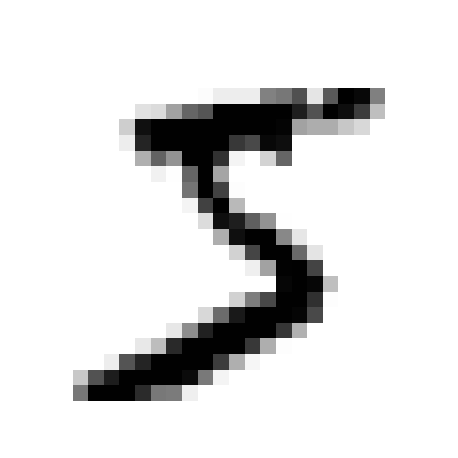

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")
plt.show()

In [ ]:
Y[0]

'5'

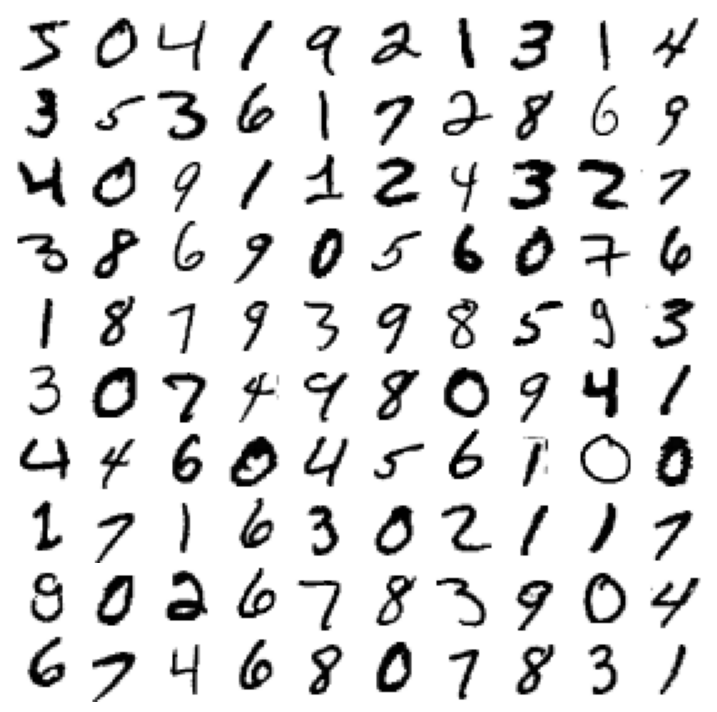

In [ ]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]
Y_train_5 = (Y_train == '5')
Y_test_5 = (Y_test == '5')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, Y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, Y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, Y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    Y_train_folds = Y_train_5[train_index]
    X_test_fold = X_train[test_index]
    Y_test_fold = Y_train_5[test_index]

    clone_clf.fit(X_train_folds, Y_train_folds)
    Y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(Y_pred == Y_test_fold)
    print(n_correct / len(Y_pred))

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, Y_train_5)
print(any(dummy_clf.predict(X_train)))

In [ ]:
cross_val_score(dummy_clf, X_train, Y_train_5, cv=3, scoring="accuracy")

In [ ]:
from sklearn.model_selection import cross_val_predict

Y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train_5, Y_train_pred)
cm

In [ ]:
Y_train_perfect_predictions = Y_train_5
confusion_matrix(Y_train_5, Y_train_perfect_predictions)

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(Y_train_5, Y_train_pred)

In [ ]:
cm[1, 1] / (cm[0, 1] + cm[1, 1])

In [ ]:
recall_score(Y_train_5, Y_train_pred)

In [ ]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

In [ ]:
from sklearn.metrics import f1_score

f1_score(Y_train_5, Y_train_pred)

In [ ]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

In [ ]:
Y_scores = sgd_clf.decision_function([some_digit])
Y_scores

In [ ]:
threshold = 0
Y_some_digit_pred = (Y_scores > threshold)

In [ ]:
Y_some_digit_pred

In [ ]:
Y_scores > 0

In [ ]:
threshold = 3000
Y_some_digit_pred = (Y_scores > threshold)
Y_some_digit_pred

In [ ]:
Y_scores = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3,
                             method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_train_5, Y_scores)

In [ ]:
thresholds, precisions

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")


idx = (thresholds >= threshold).argmax()
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

In [ ]:
import matplotlib.patches as patches

plt.figure(figsize=(6, 5))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [ ]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

In [ ]:
Y_train_pred_90 = (Y_scores >= threshold_for_90_precision)

In [ ]:
precision_score(Y_train_5, Y_train_pred_90)

In [ ]:
recall_at_90_precision = recall_score(Y_train_5, Y_train_pred_90)
recall_at_90_precision

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_train_5, Y_scores)

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_train_5, Y_scores)